In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/Users/LENOVO/Downloads/iris_dataset.csv")
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
wcss = []
for i in range(1,15):
    kmeans=KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[680.8243999999996,
 152.36870647733915,
 78.94506582597728,
 57.4732732654949,
 46.56163015873017,
 43.639708485958494,
 34.72966880341881,
 30.085448259233445,
 28.971256684491973,
 27.774330613830628,
 24.81062253185624,
 23.560302808302808,
 21.741606778025908,
 20.440401515151507]

Text(0, 0.5, 'WCSS')

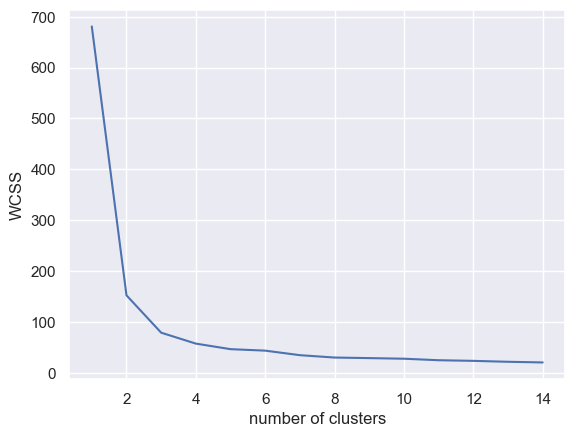

In [4]:
plt.plot(range(1,15),wcss)
plt.xlabel('number of clusters')
plt.ylabel('WCSS')


In [11]:
kmeans_new = KMeans(3)
kmeans_new.fit(data)
clusters = kmeans_new.fit_predict(data)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [12]:
data.columns.unique

<bound method Index.unique of Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')>

Text(0, 0.5, 'sepal_length')

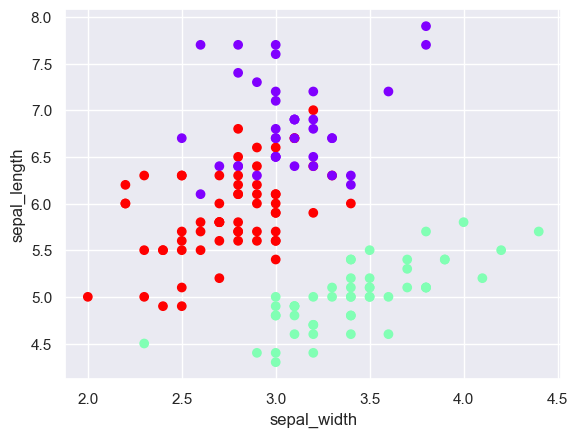

In [31]:
data_with_clusters=data.copy()
data_with_clusters['Clusters'] = clusters
plt.scatter(data['sepal_width'],data['sepal_length'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')

In [19]:
from sklearn import preprocessing
x = data.copy()
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [20]:
wcss=[]
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0000000000003,
 223.73200573676343,
 140.96837895511072,
 114.61550694959811,
 103.26928447472584,
 82.26206861758128,
 71.3198209518879,
 65.84545903898184,
 54.64464817332937]

Text(0, 0.5, 'wcss')

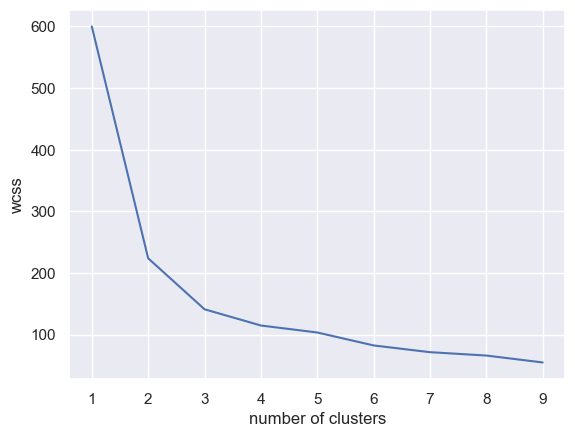

In [21]:
plt.plot(range(1,10),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [25]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


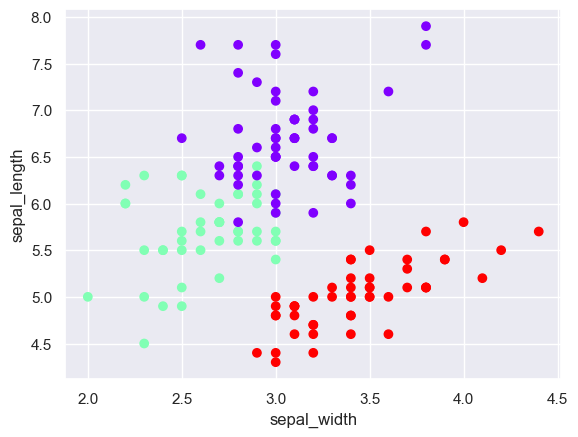

In [28]:
plt.scatter(clusters_new['sepal_width'],clusters_new['sepal_length'],c=clusters_new['pred'],cmap='rainbow')
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')
plt.show()

In [32]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


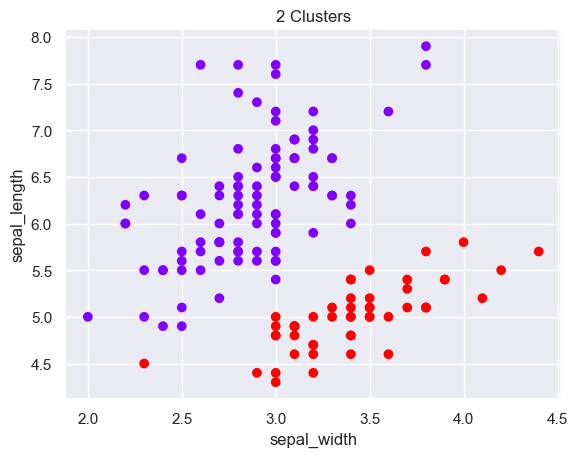

In [35]:
plt.scatter(clusters_new['sepal_width'],clusters_new['sepal_length'],c=clusters_new['pred'],cmap='rainbow')
plt.xlabel('sepal_width')
plt.ylabel('sepal_length')
plt.title('2 Clusters')
plt.show()

In [37]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


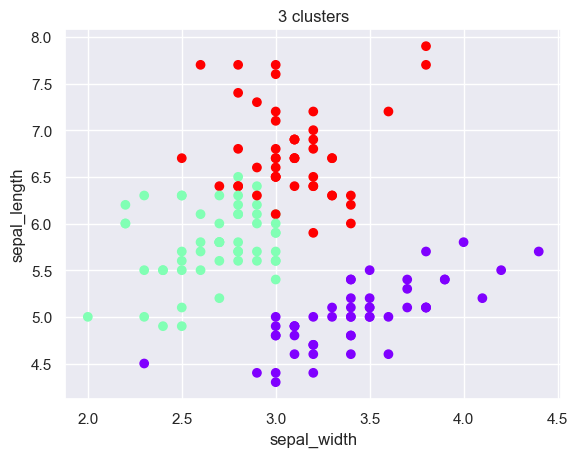

In [38]:
plt.scatter(clusters_new['sepal_width'],clusters_new['sepal_length'],c=clusters_new['pred'],cmap='rainbow')
plt.xlabel('sepal_width')
plt.title('3 clusters')
plt.ylabel('sepal_length')
plt.show()

In [43]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,4
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,2


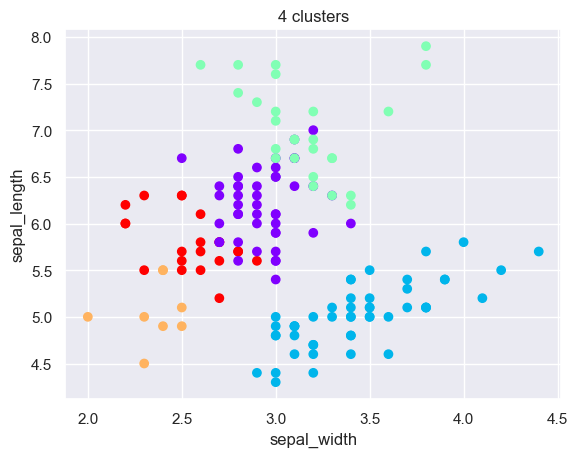

In [44]:
plt.scatter(clusters_new['sepal_width'],clusters_new['sepal_length'],c=clusters_new['pred'],cmap='rainbow')
plt.xlabel('sepal_width')
plt.title('4 clusters')
plt.ylabel('sepal_length')
plt.show()

In [46]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


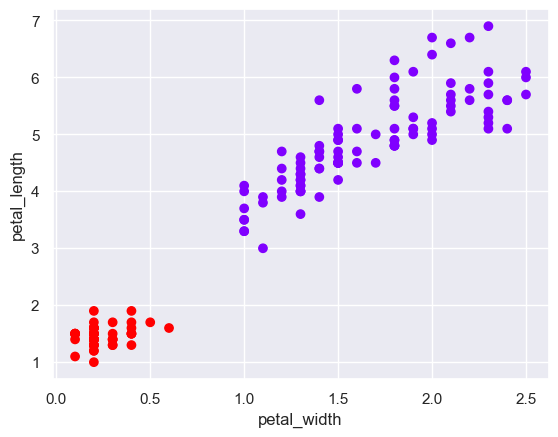

In [47]:
plt.scatter(clusters_new['petal_width'],clusters_new['petal_length'],c=clusters_new['pred'],cmap='rainbow')
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.show()

In [48]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


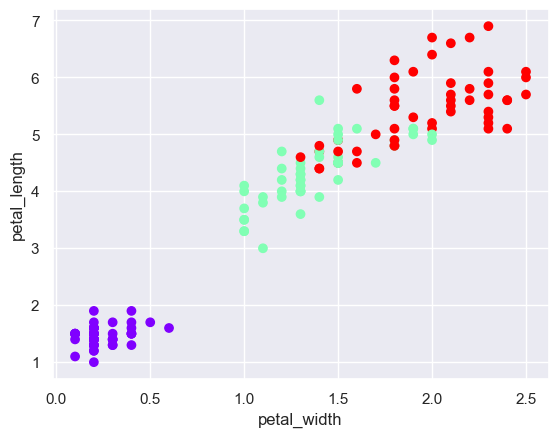

In [49]:
plt.scatter(clusters_new['petal_width'],clusters_new['petal_length'],c=clusters_new['pred'],cmap='rainbow')
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.show()

In [50]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['pred'] = kmeans_new.fit_predict(x_scaled)
clusters_new

,sepal_length,sepal_width,petal_length,petal_width,pred
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


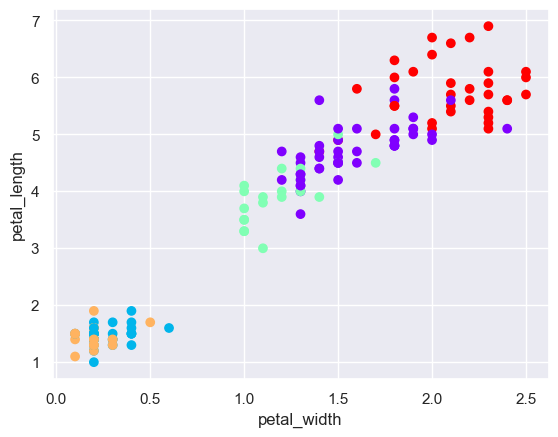

In [51]:
plt.scatter(clusters_new['petal_width'],clusters_new['petal_length'],c=clusters_new['pred'],cmap='rainbow')
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.show()

In [54]:
real_data = pd.read_csv("C:/Users/LENOVO/Downloads/iris_with_answers.csv")
real_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [57]:
real_data_mapped = real_data.copy()
real_data_mapped['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

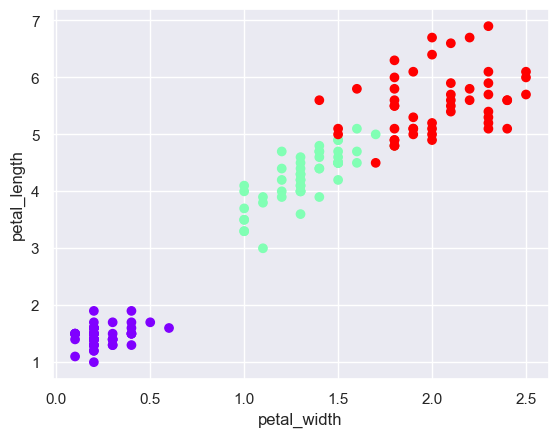

In [58]:
real_data_mapped['species'] = real_data_mapped['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
plt.scatter(real_data_mapped['petal_width'],real_data_mapped['petal_length'],c=real_data_mapped['species'],cmap='rainbow')
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.show()